# Support Vector Machines

Support Vector Machines are linear classifiers that find very robust classifiers. In particular, they maximize the margin between the decision boundary and the positive/negative examples.

This decision boundary is described by a weighted combination of a set of border examples, the so called Support Vectors.

SVMs can be extended to non-linear classifiers using so called Kernel Methods (out of scope here)

<p>

<div class="alert alert-info">
Support Vector Machines are usually a very good choice for classification tasks due to their robustnes against irrelevant features and noisy examples, especially in high-dimensional input spaces.
</div>

## SVM Margins Example
The plots illustrate the influence of the parameter C on the separation line. With a large value of C, only points close to the line of separation are considered. A small value of C allows the margins to be calculated using all data in the area. (Example adapted from the [scikit-learn documentation](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py))

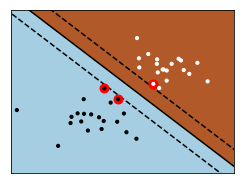

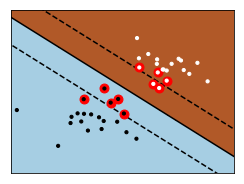

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='red', zorder=9)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, s=10)

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

## SVM Classification on the IRIS dataset
First we load the dataset, do a random permutation and split it into training and test data. The last 10 samples are used for testing, the remainder for training.

In [20]:
from sklearn import datasets
iris = datasets.load_iris()
np.random.seed(0)
indices = np.random.permutation(len(iris.data))
iris_X_train = iris.data[indices[:-10]]
iris_y_train = iris.target[indices[:-10]]
iris_X_test  = iris.data[indices[-10:]]
iris_y_test  = iris.target[indices[-10:]]

Train and evaluate the SVM Classifier (accuracy)

In [21]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [22]:
print ("Predicted flower classes:\t", clf.predict(iris_X_test))
print ("True flower classes     :\t", iris_y_test)
print ("Correct classifciation? :\t", clf.predict(iris_X_test) == iris_y_test)
print ("Accuracy (in %)  :\t", \
      np.sum(svc.predict(iris_X_test) == iris_y_test)*100.0\
      /len(iris_y_test))

Predicted flower classes:	 [1 2 1 0 0 0 2 1 2 0]
True flower classes     :	 [1 1 1 0 0 0 2 1 2 0]
Correct classifciation? :	 [ True False  True  True  True  True  True  True  True  True]
Accuracy (in %)  :	 90.0


## SVM for Optical Character Recognition (OCR)

In [23]:
digits = datasets.load_digits()
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

Visualise some of the data to get an idea how the datapoints look like

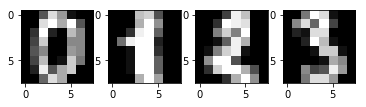

In [25]:
plt.figure()
plt.subplot(1,4,1)
plt.imshow(digits.images[0],cmap=plt.gray(),interpolation='nearest')
plt.subplot(1,4,2)
plt.imshow(digits.images[1],cmap=plt.gray(),interpolation='nearest')
plt.subplot(1,4,3)
plt.imshow(digits.images[2],cmap=plt.gray(),interpolation='nearest')
plt.subplot(1,4,4)
plt.imshow(digits.images[3],cmap=plt.gray(),interpolation='nearest')
plt.show()

In [29]:
# instantiate the classifier with some parameters
clf = svm.SVC(gamma=0.001,C=100)
# now we train/fit the model using the data and the target
clf.fit(digits.data[:-3],digits.target[:-3])

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
# now we predict which numbers the last 3 images are
clf.predict(digits.data[-3:])

array([8, 9, 8])

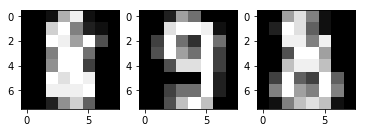

In [32]:
#lets see if the classifier did it right?
plt.figure()
plt.subplot(1,3,1)
plt.imshow(digits.images[-3],cmap=plt.gray(),interpolation='nearest')
plt.subplot(1,3,2)
plt.imshow(digits.images[-2],cmap=plt.gray(),interpolation='nearest')
plt.subplot(1,3,3)
plt.imshow(digits.images[-1],cmap=plt.gray(),interpolation='nearest')
plt.show()